In [1]:
import pandas as pd
import numpy as np


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, x, Intercept]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [00:02<00:00, 1946.43draws/s]


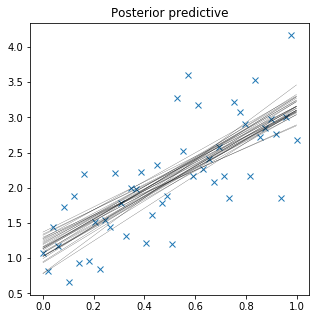